In [1]:
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
dataset = read.csv("C://Users//thoma//OneDrive//Dokumenter//GitHub//Biba1//BankChurners.csv")
dataset <- dataset[, -c(22:23)]

In [5]:
summary(dataset)

   CLIENTNUM                   Attrition_Flag  Customer_Age   Gender  
 Min.   :708082083   Attrited Customer:1627   Min.   :26.00   F:5358  
 1st Qu.:713036770   Existing Customer:8500   1st Qu.:41.00   M:4769  
 Median :717926358                            Median :46.00           
 Mean   :739177606                            Mean   :46.33           
 3rd Qu.:773143533                            3rd Qu.:52.00           
 Max.   :828343083                            Max.   :73.00           
                                                                      
 Dependent_count      Education_Level  Marital_Status       Income_Category
 Min.   :0.000   College      :1013   Divorced: 748   $120K +       : 727  
 1st Qu.:1.000   Doctorate    : 451   Married :4687   $40K - $60K   :1790  
 Median :2.000   Graduate     :3128   Single  :3943   $60K - $80K   :1402  
 Mean   :2.346   High School  :2013   Unknown : 749   $80K - $120K  :1535  
 3rd Qu.:3.000   Post-Graduate: 516                 

In [6]:
str(dataset)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : Factor w/ 2 levels "Attrited Customer",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Mo

# Here we display the distribution of customers who leaves depending on their education level

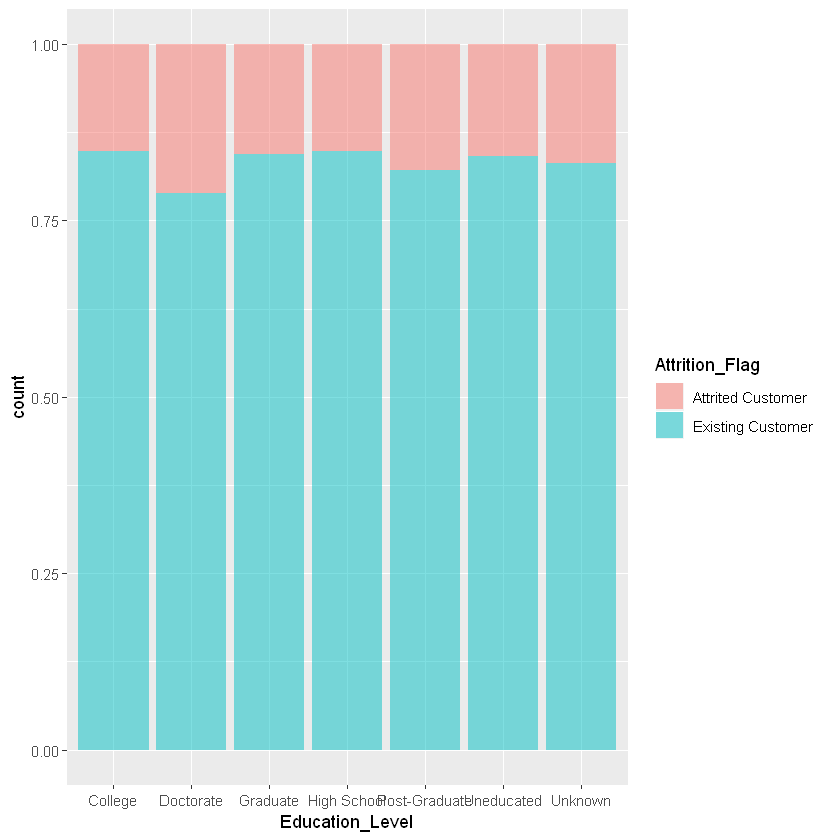

In [8]:
dataset %>%
ggplot(aes(x=Education_Level,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")

The Procentive distibution

In [9]:
dataset %>%
count(Education_Level,Attrition_Flag)%>%
group_by(Education_Level)%>%
mutate(p=n/sum(n)*100)

Education_Level,Attrition_Flag,n,p
College,Attrited Customer,154,15.20237
College,Existing Customer,859,84.79763
Doctorate,Attrited Customer,95,21.06430
Doctorate,Existing Customer,356,78.93570
Graduate,Attrited Customer,487,15.56905
Graduate,Existing Customer,2641,84.43095
High School,Attrited Customer,306,15.20119
High School,Existing Customer,1707,84.79881
Post-Graduate,Attrited Customer,92,17.82946
Post-Graduate,Existing Customer,424,82.17054


# The Distibution of customers leaving and the amount of inactive Months

In [10]:
Attrition_Flag_And_Inactive <- select(dataset, Attrition_Flag, Months_Inactive_12_mon)

In [11]:
Attrition_Flag_And_Inactive <- dataset %>%
count(Attrition_Flag, Months_Inactive_12_mon)%>%
group_by(Months_Inactive_12_mon) %>%
mutate(p=n/sum(n)*100)

Attrition_Flag_Attrited <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Attrited Customer")

Attrition_Flag_Existing <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Existing Customer")

Attrition_Flag_And_Months_Inactive = merge(x=Attrition_Flag_Attrited,y=Attrition_Flag_Existing,by="Months_Inactive_12_mon")

better_Attrition_Flag_And_Months_Inactive <- Attrition_Flag_And_Months_Inactive %>%
select(Months_Inactive_12_mon, p.x, p.y)

names(better_Attrition_Flag_And_Months_Inactive)[2] <- "Stays"
names(better_Attrition_Flag_And_Months_Inactive)[3] <-"Leaves"

In [12]:
better_Attrition_Flag_And_Months_Inactive

Months_Inactive_12_mon,Stays,Leaves
0,51.72414,48.27586
1,4.47828,95.52172
2,15.38696,84.61304
3,21.47686,78.52314
4,29.88506,70.11494
5,17.97753,82.02247
6,15.32258,84.67742


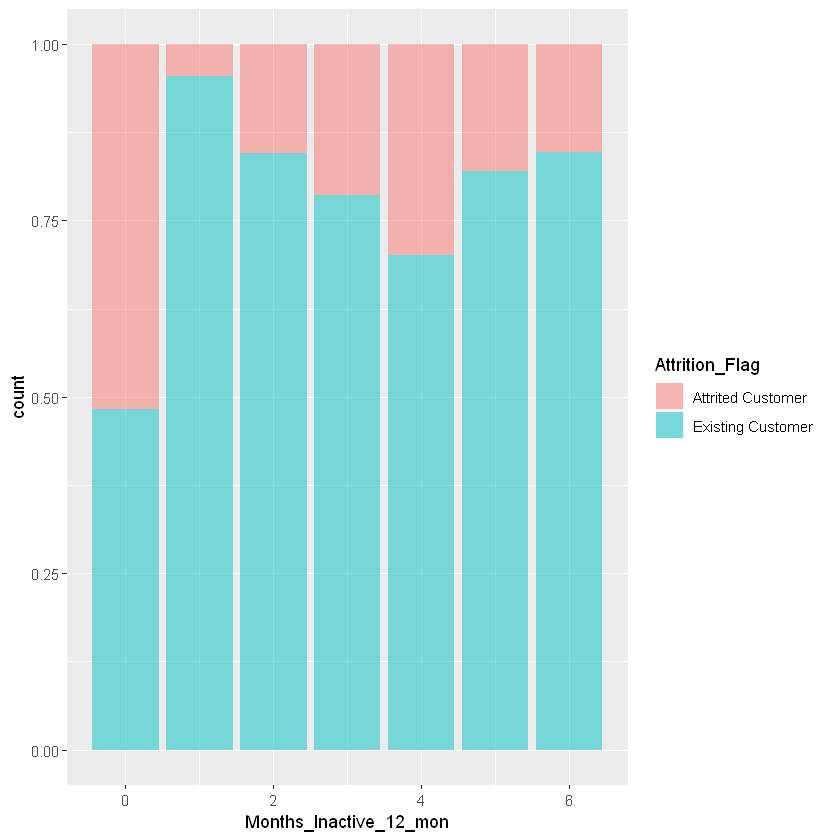

In [13]:
dataset %>%
ggplot(aes(x=Months_Inactive_12_mon,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")